In [1]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img = imread('Blaumeise.jpg')

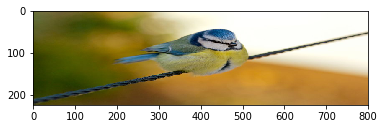

In [3]:
plt.imshow(img[::2])

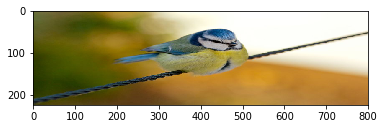

In [4]:
plt.imshow(img[1::2])

In [5]:
img2 = np.vstack((img[::2],img[1::2]))

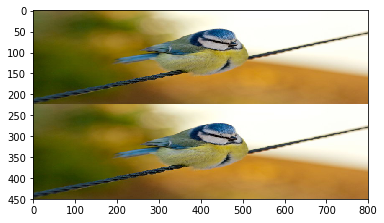

In [6]:
plt.imshow(img2)

In [7]:
def resize_array(array, size, orientation='vert', square=False):
    if square:
        min_size = min(array.shape[:2])
        array = array[:min_size, :min_size]
        vert_size = hor_size = size * int(min_size / size / 2) * 2
    else:
        if orientation == 'vert':
            vert_size = size * int(array.shape[0] / size / 2) * 2
            hor_size = array.shape[1]
        else:
            hor_size = size * int(array.shape[1] / size / 2) * 2
            vert_size = array.shape[0]
     
    if array.max() > 1:
        array = array / 255

    return array[:vert_size,:hor_size]

def h_slice(array, size, square=False):
    array = resize_array(array, size, square=square)
    s0 = array.shape[0]
    s1 = array.shape[1]
    s2 = array.shape[2]
    
    
    out1 = np.empty(shape=(s0,s1,s2))
    out1.fill(np.nan)
    out2 = np.empty(shape=(s0,s1,s2))
    out2.fill(np.nan)
    iter = int(s0 / size)
    for i in range(iter): 
        start = size * i
        stop = start + size
        if i % 2 == 0:
            out1[start:stop] = array[start:stop]
        else:
            out2[start:stop] = array[start:stop]
    out1 = out1[~np.isnan(out1)].reshape(int(s0 / 2),s1,s2)
    out2 = out2[~np.isnan(out2)].reshape(int(s0 / 2),s1,s2)
    out = np.vstack((out1,out2))
    
    return out

def v_slice(array, size):
    array = resize_array(array, size, orientation='hor')
    
    s0 = array.shape[0]
    s1 = array.shape[1]
    s2 = array.shape[2]
    
    
    out1 = np.empty(shape=(s0,s1,s2))
    out1.fill(np.nan)
    out2 = np.empty(shape=(s0,s1,s2))
    out2.fill(np.nan)
    iter = int(s1 / size)
    for i in range(iter): 
        start = size * i
        stop = start + size
        if i % 2 == 0:
            out1[:,start:stop] = array[:,start:stop]
        else:
            out2[:,start:stop] = array[:,start:stop]
    out1 = out1[~np.isnan(out1)].reshape(s0,int(s1 / 2),s2)
    out2 = out2[~np.isnan(out2)].reshape(s0,int(s1 / 2),s2)
    out = np.hstack((out1,out2))
    return out

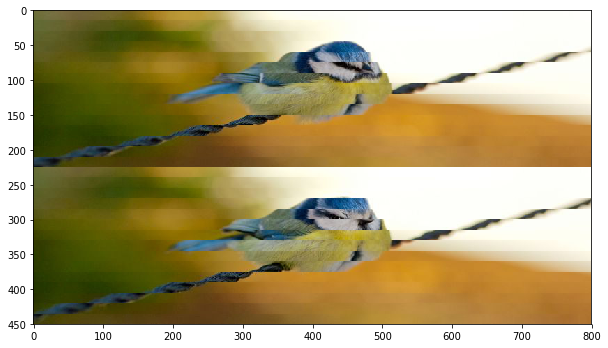

In [8]:
s_slice = 15
out = h_slice(img,s_slice)

fig1 = plt.figure(figsize=(10,10))
ax = fig1.add_subplot(111)
ax.imshow(out, interpolation='none')

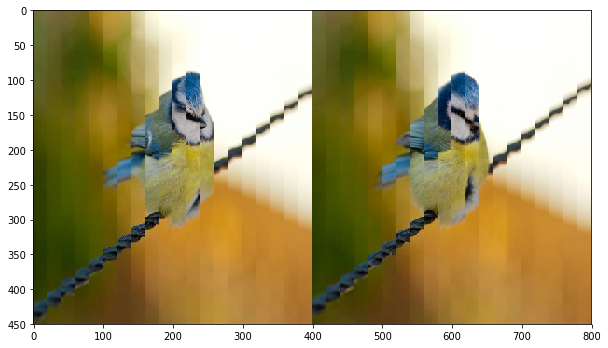

In [17]:
s_slice = 20
out = v_slice(img,s_slice)

fig1 = plt.figure(figsize=(10,10))
ax = fig1.add_subplot(111)
ax.imshow(out, interpolation='none')

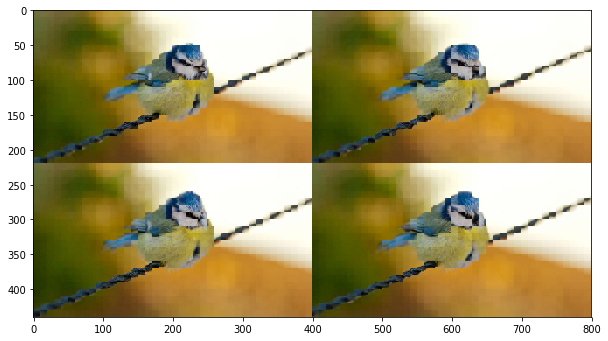

In [16]:
s_slice = 10
out = h_slice(v_slice(img,s_slice), s_slice)

fig1 = plt.figure(figsize=(10,10))
ax = fig1.add_subplot(111)
ax.imshow(out, interpolation='none')

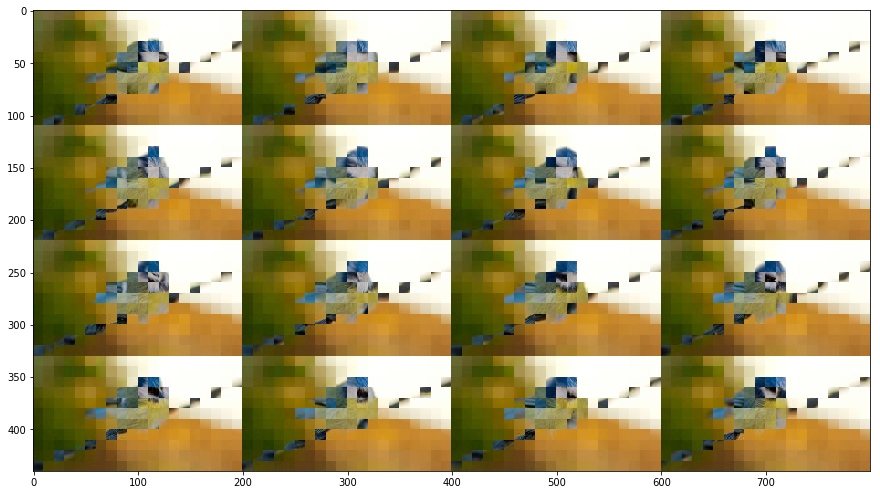

In [19]:
s_slice = 10
out = v_slice(h_slice(v_slice(h_slice(img,s_slice),s_slice),s_slice),s_slice)

fig1 = plt.figure(figsize=(15,15))
ax = fig1.add_subplot(111)
ax.imshow(out, interpolation='none')